<a href="https://colab.research.google.com/github/rbcass/Orpheus2/blob/master/Classical909.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading files & Analysis

# File sorting

In [ ]:
!pip install fluidsynth
!pip install pretty_midi
!pip install music21

  Preparing metadata (setup.py) ... done
  Created wheel for fluidsynth: filename=fluidsynth-0.2-py3-none-any.whl size=4487 sha256=755c63a1cd662f3b924e170269a0cc4869cd4ac5f5a8dbbcbcb06f8599ed2ca2
  Stored in directory: /root/.cache/pip/wheels/72/5a/bf/347b142f199fb1bea87f16f8970916226951bc359c947ba19b
Successfully built fluidsynth
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.6 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=b9898ee0f28584e6f02017020b31e35cc592baa1fa29e23441812e04dcb8494a
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    

In [ ]:

import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf
from music21 import *


from IPython import display
from matplotlib import pyplot as plt
from typing import Optional


In [ ]:
import os

# Define the MIDI folder path
midi_folder = "/content/drive/MyDrive/classical_orph"

if os.path.exists(midi_folder):
    all_files = os.listdir(midi_folder)
    midi_files = [file for file in all_files if file.endswith(".mid")]

    print('Number of files: ', len(all_files))
    print('MIDI files: ', midi_files)
else:
    print(f"The specified MIDI folder '{midi_folder}' does not exist.")

Number of files:  968
MIDI files:  ['0_ce0227884faa517a92739eef2813b6f6.mid', '7_327d47145969c0e77f4ea3e9c1314b14.mid', '7_3074063f0415c0fd8d158929c42e4093.mid', '1_651ccb85019c5d6308da2710cafa5c9e.mid', 'f_15ff4b28a8b6e805cc9b06d6c3c1858f.mid', 'f_cffc188b416149b9c2e132fecaaff34b.mid', '8_0e8ee902acae6f48236f24d7138e10ce.mid', '9_3096cb52cec17baf1d07b499612d3ce7.mid', 'e_f7e811a16b786d0e1c169a675fd4811f.mid', '1_4412494b75f7ad2796cee7a773bc10da.mid', '8_8b8f88a21c0a9787fd8eda014c00188c.mid', 'f_3cf7900bb99fad23f49fae0f3e243312.mid', '0_8404700890af2f20ad5f61d55e51e55c.mid', 'f_b8f33e903334903713f76386d200a82f.mid', '7_d676f2dc0457fa8dc6abe350d944e08c.mid', 'e_d5e8916c43a7f5c379b04c76f251512a.mid', '8_bc8a948c1059fa168ba90ce695b2cec6.mid', '7_6a79373a13d1ae85d7739b5a56f52976.mid', '8_ef8da5adb3a186ff5788f0bacac60ef8.mid', '8_398f3b4bd265837e1eebad86e294b824.mid', '9_999f923ed5821cbc6d206062748a17b1.mid', '9_8e942f93eed7314b3280ed86f327a1bf.mid', '1_89107536a9451435d5e8e9221118e02f.mid'

In [ ]:
#CLASSICAL


In [ ]:
def load_midi_file(file_path):
    try:
        pm = pretty_midi.PrettyMIDI(file_path)
        return pm
    except Exception as e:
        print(f"Error loading MIDI file: {e}")
        return None

In [ ]:
def display_midi_info(pm):
    if pm is not None:
        print('Number of instruments:', len(pm.instruments))
        if pm.instruments:
            instrument = pm.instruments[0]
            instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
            print('Instrument name:', instrument_name)
        else:
            print('No instruments found in the MIDI file.')

In [ ]:
def print_note_info(instrument):
    if instrument is not None:
        for i, note in enumerate(instrument.notes[:10]):
            note_name = pretty_midi.note_number_to_name(note.pitch)
            duration = note.end - note.start
            print(f'{i}: pitch={note.pitch}, note_name={note_name}, duration={duration:.4f}')

In [ ]:
#print("Available MIDI files:")
#for i, file_name in enumerate(midi_files):
 #   print(f"{i + 1}: {file_name}")

# User prompt to select midi
try:
    file_index = int(input("Enter the index of the MIDI file you want to load: ")) - 1
    if 0 <= file_index < len(midi_files):
        file_path = os.path.join(midi_folder, midi_files[file_index])
        pm = load_midi_file(file_path)
        print(f'Successfully loaded PrettyMIDI object from {midi_files[file_index]}.')

        # Display MIDI file information
        display_midi_info(pm)

        # Print note information
        if pm.instruments:
            print("\nNote information:")
            print_note_info(pm.instruments[0])  # Print notes from the first instrument
    else:
        print("Invalid index. Please enter a valid index.")
except ValueError:
    print("Invalid input. Please enter a valid integer index.")
except Exception as e:
    print(f"An error occurred: {e}")

Enter the index of the MIDI file you want to load: 34
Successfully loaded PrettyMIDI object from 1_3b18bb4374872dfdf4fc6c6e90aeb4b1.mid.
Number of instruments: 5
Instrument name: Choir Aahs

Note information:
0: pitch=72, note_name=C5, duration=0.7484
1: pitch=72, note_name=C5, duration=1.1234
2: pitch=69, note_name=A4, duration=0.3734
3: pitch=71, note_name=B4, duration=0.7484
4: pitch=71, note_name=B4, duration=0.7484
5: pitch=71, note_name=B4, duration=0.7484
6: pitch=72, note_name=C5, duration=0.3734
7: pitch=69, note_name=A4, duration=0.3734
8: pitch=71, note_name=B4, duration=0.3734
9: pitch=67, note_name=G4, duration=0.3734


# MIDI & Note processing

In [ ]:
#Trying key normalisation


In [ ]:
def midi_to_notes(midi_file: str, target_key: int) -> pd.DataFrame:
    try:
        file_path = os.path.join(midi_folder, midi_file)
        pm = pretty_midi.PrettyMIDI(file_path)
    except FileNotFoundError:
        print(f"FileNotFoundError: file does not exist: {midi_file}")
        return pd.DataFrame()

    if len(pm.instruments) == 0:
        print(f"No instruments found in the MIDI file: {midi_file}")
        return pd.DataFrame()

    instrument = pm.instruments[0]
    notes = collections.defaultdict(list)
    sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
    prev_start = sorted_notes[0].start

    # key number of the first note
    key_number = sorted_notes[0].pitch % 12
    # calculate semi-tone shift
    semitone_shift = target_key - key_number

    for note in sorted_notes:
        # Transpose note to target key's octave
        transposed_pitch = (note.pitch + semitone_shift) % 12
        # Octave constraint
        while transposed_pitch > 11:
            transposed_pitch -= 12
        while transposed_pitch < 0:
            transposed_pitch += 12
        transposed_pitch += target_key

        start = note.start
        end = note.end
        notes['pitch'].append(transposed_pitch)
        notes['start'].append(start)
        notes['end'].append(end)
        notes['step'].append(start - prev_start)
        notes['duration'].append(end - start)
        prev_start = start

    # Convert notes dict to dataframe
    notes_df = pd.DataFrame({name: np.array(value) for name, value in notes.items()})

    # Filter to diatonic notes in target key
    def diatonic_scale(df, target_key):
        scale_degrees = [0, 2, 3, 5, 7, 8, 10] # Natural minor
        is_diatonic = df['pitch'].map(lambda p: (p - target_key) % 12 in scale_degrees)
        return df[is_diatonic]

    diatonic_notes_df = diatonic_scale(notes_df, target_key)
    return diatonic_notes_df

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

In [ ]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

# Training

In [ ]:

num_files = len(all_files)
split_ratio = 0.6
target_key = 60
all_notes = []
for f in all_files[:num_files]:
  notes = midi_to_notes(f,target_key)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 178466


In [ ]:
print("Statistical Summary of Note Attributes:")
print(all_notes[['pitch', 'duration', 'step']].describe())
#print(all_notes['key'].value_counts())

##
first_5_midi_notes = all_notes.head(5)
#print(first_5_midi_notes[['pitch', 'duration', 'step']].describe())

Statistical Summary of Note Attributes:
               pitch       duration           step
count  178466.000000  178466.000000  178466.000000
mean       64.289103       0.462463       0.463069
std         3.401232       0.487407       1.604442
min        60.000000       0.000868       0.000000
25%        60.000000       0.151042       0.015625
50%        65.000000       0.356445       0.257732
75%        67.000000       0.583274       0.500000
max        70.000000      36.020833     286.079370


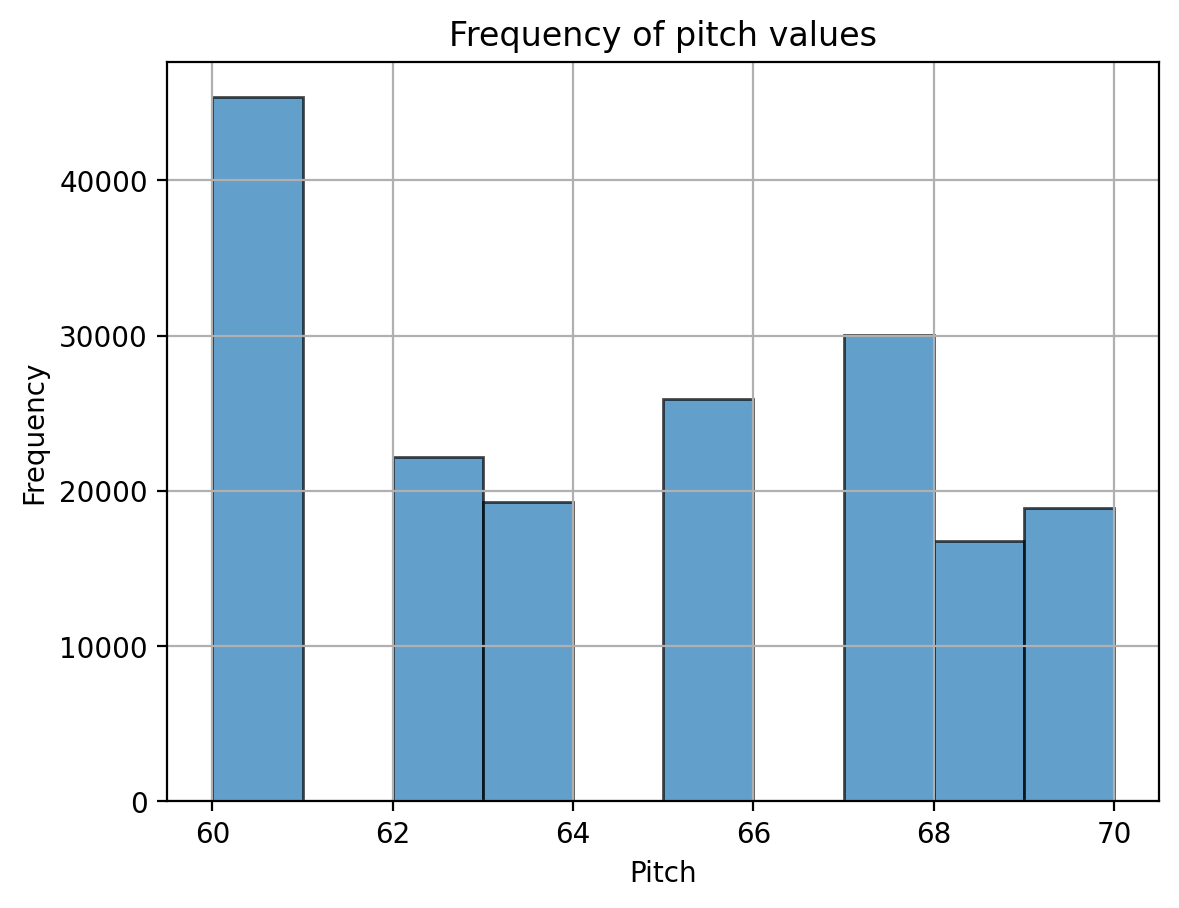

In [ ]:
plt.hist(all_notes['pitch'],edgecolor='black', alpha=0.7)
plt.xlabel('Pitch')
plt.ylabel('Frequency')
plt.title('Frequency of pitch values')
plt.grid(True)
plt.show()

In [ ]:
#Create dataset from parsed notes
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [ ]:
#Split the dataset into training and validation
from sklearn.model_selection import train_test_split

train_notes, val_notes = train_test_split(train_notes, test_size=1-split_ratio, random_state=42)
print("Length of train_notes after split:", len(train_notes))
print("Length of val_notes:", len(val_notes))


Length of train_notes after split: 107079
Length of val_notes: 71387


In [ ]:

def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)
###
seq_length = 100
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(100, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [ ]:
# Datasets for training and validation
train_ds = tf.data.Dataset.from_tensor_slices(train_notes)
val_ds = tf.data.Dataset.from_tensor_slices(val_notes)

# Sequences for training and validation
seq_ds_train = create_sequences(train_ds, seq_length, vocab_size)
seq_ds_val = create_sequences(val_ds, seq_length, vocab_size)

In [ ]:
batch_size = 48
buffer_size_train = len(train_notes) - seq_length
buffer_size_val = len(val_notes) - seq_length  # the number of items in the dataset

train_ds = (seq_ds_train
            .shuffle(buffer_size_train)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))
val_ds = (seq_ds_val
          .batch(batch_size, drop_remainder=True)
          .cache()
          .prefetch(tf.data.experimental.AUTOTUNE))
#train_ds.element_spec
val_ds.element_spec
#

(TensorSpec(shape=(48, 100, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(48,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(48,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(48,), dtype=tf.float64, name=None)})

# MODEL

In [ ]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [ ]:
#Initialise model architecture -classisc
input_shape = (seq_length, 3)
learning_rate = 0.0001

#model layers and stuff
inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(400)(inputs)
x = tf.keras.layers.Dropout(0.7)(x)

outputs = {
  'pitch': tf.keras.layers.Dense(127, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss,
              loss_weights={
                  'pitch': 0.05,
                  'step': 1,
                  'duration': 1,
              },
              optimizer=optimizer,
              metrics={
                  'pitch': 'sparse_categorical_accuracy',
                  'step': 'mae',
                  'duration': 'mae'
              })

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 3)]             0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 400)                  646400    ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 400)                  0         ['lstm[0][0]']                
                                                                                                  
 duration (Dense)            (None, 1)                    401       ['dropout[0][0]']             
                                                                                              

In [ ]:
#train
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=f'./model_checkpointBLUES.keras',
        save_weights_only=True,
        save_freq = 'epoch'
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]
epochs = 50
#val_data = (val_ds.map(lambda x, y: x), val_ds.map(lambda x, y: y))
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=callbacks,
)

model.save('./model_weightsclassical.h5')

Epoch 1/50
2228/2228 [==============================] - 59s 16ms/step - loss: 2.9357 - duration_loss: 0.2531 - pitch_loss: 2.5907 - step_loss: 2.5531 - duration_mae: 0.3218 - pitch_sparse_categorical_accuracy: 0.2372 - step_mae: 0.4329 - val_loss: 2.9634 - val_duration_loss: 0.2365 - val_pitch_loss: 1.9645 - val_step_loss: 2.6287 - val_duration_mae: 0.3019 - val_pitch_sparse_categorical_accuracy: 0.2538 - val_step_mae: 0.4141
Epoch 2/50
2228/2228 [==============================] - 27s 12ms/step - loss: 2.8873 - duration_loss: 0.2449 - pitch_loss: 1.9492 - step_loss: 2.5449 - duration_mae: 0.3149 - pitch_sparse_categorical_accuracy: 0.2514 - step_mae: 0.4280 - val_loss: 2.9610 - val_duration_loss: 0.2372 - val_pitch_loss: 1.9088 - val_step_loss: 2.6284 - val_duration_mae: 0.3001 - val_pitch_sparse_categorical_accuracy: 0.2538 - val_step_mae: 0.4142
Epoch 3/50
2228/2228 [==============================] - 27s 12ms/step - loss: 2.8799 - duration_loss: 0.2429 - pitch_loss: 1.9147 - step_los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
min_loss = min(min(history.history['loss']), min(history.history['val_loss']))
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))

(2.8694095611572266, 2.9634437561035156)

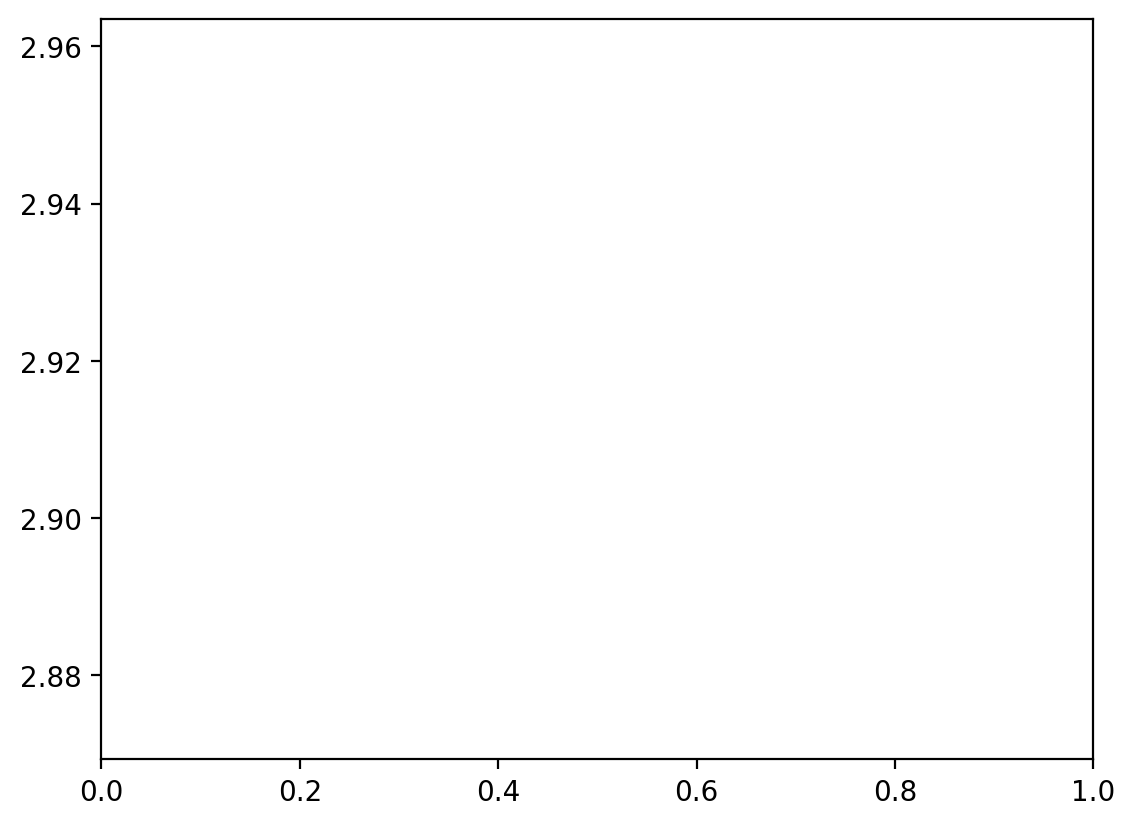

In [ ]:
plt.ylim(min_loss, max_loss)

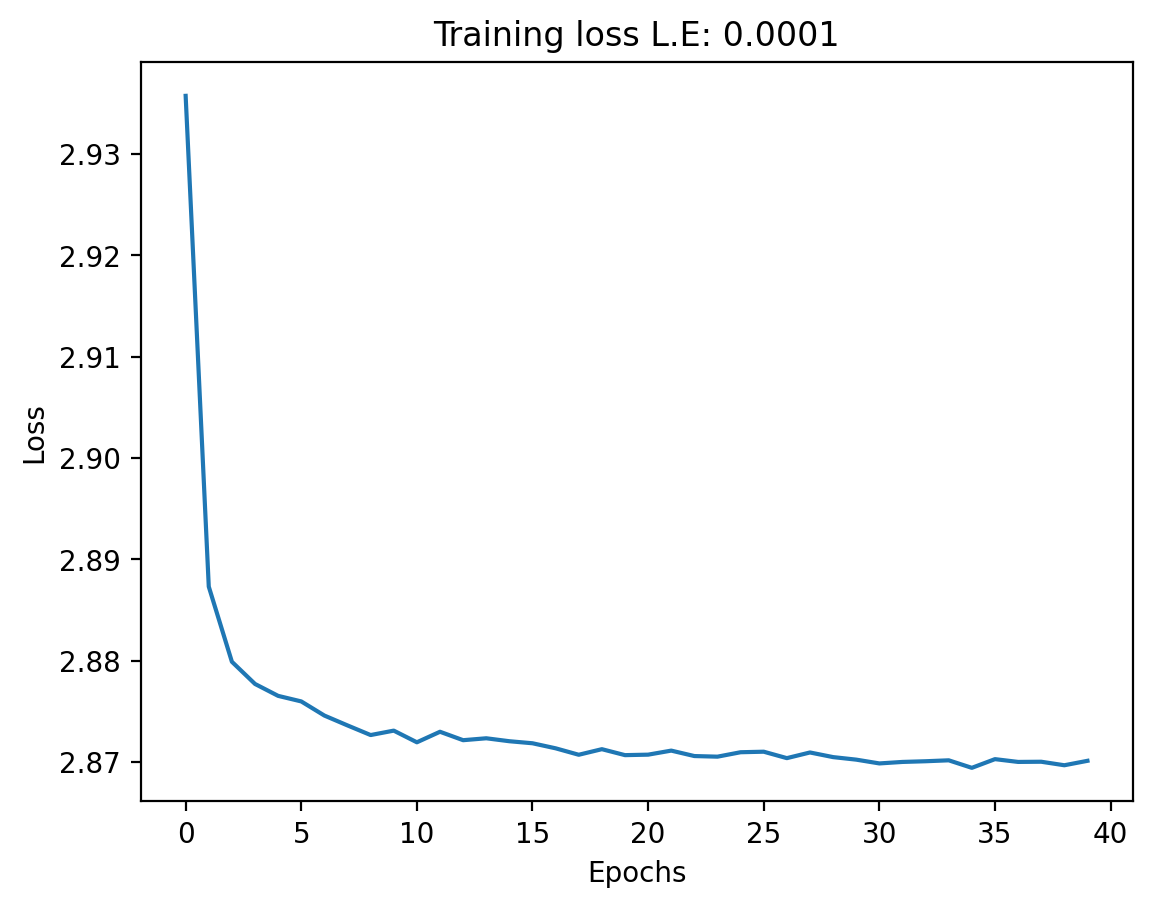

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss L.E: 0.0001')
plt.show()
#

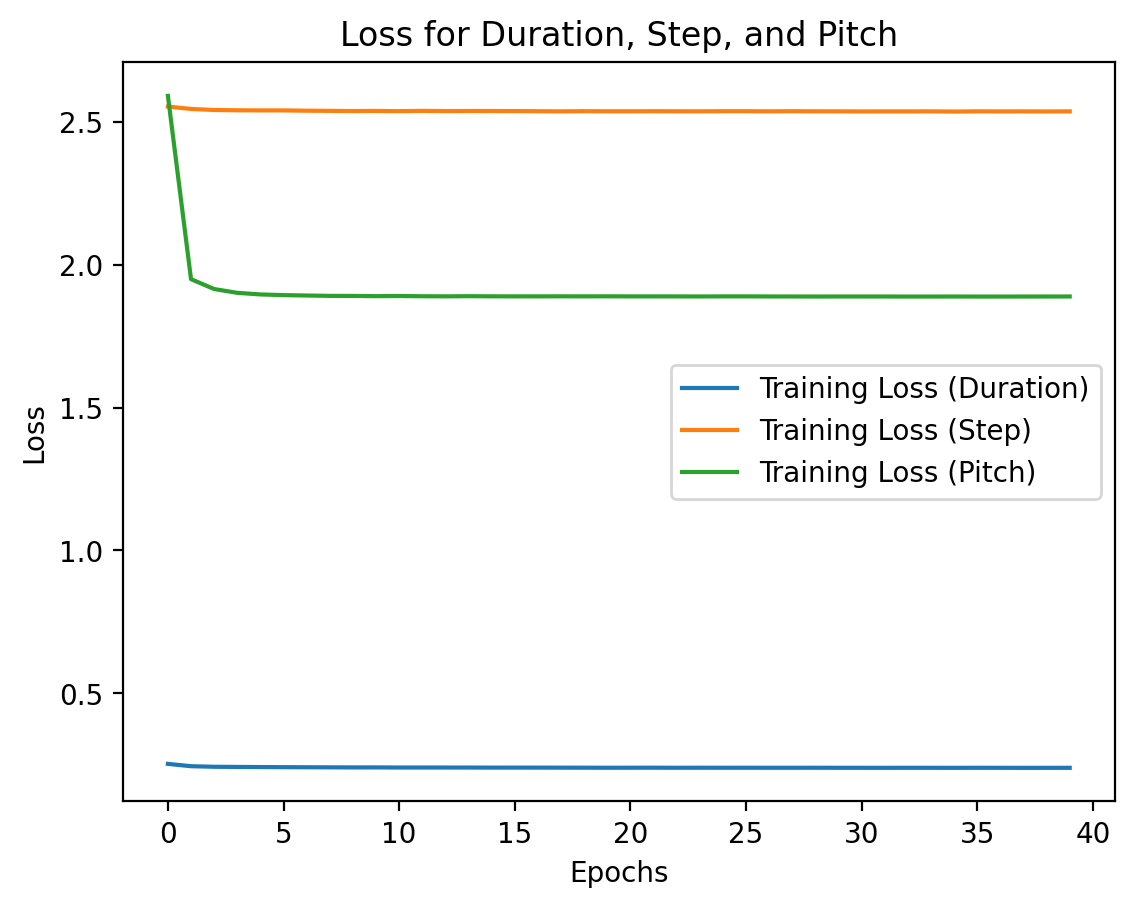

In [ ]:
#For inputs
plt.plot(history.epoch, history.history['duration_loss'], label='Training Loss (Duration)')
plt.plot(history.epoch, history.history['step_loss'], label='Training Loss (Step)')
plt.plot(history.epoch, history.history['pitch_loss'], label='Training Loss (Pitch)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for Duration, Step, and Pitch')
plt.legend()
plt.show()

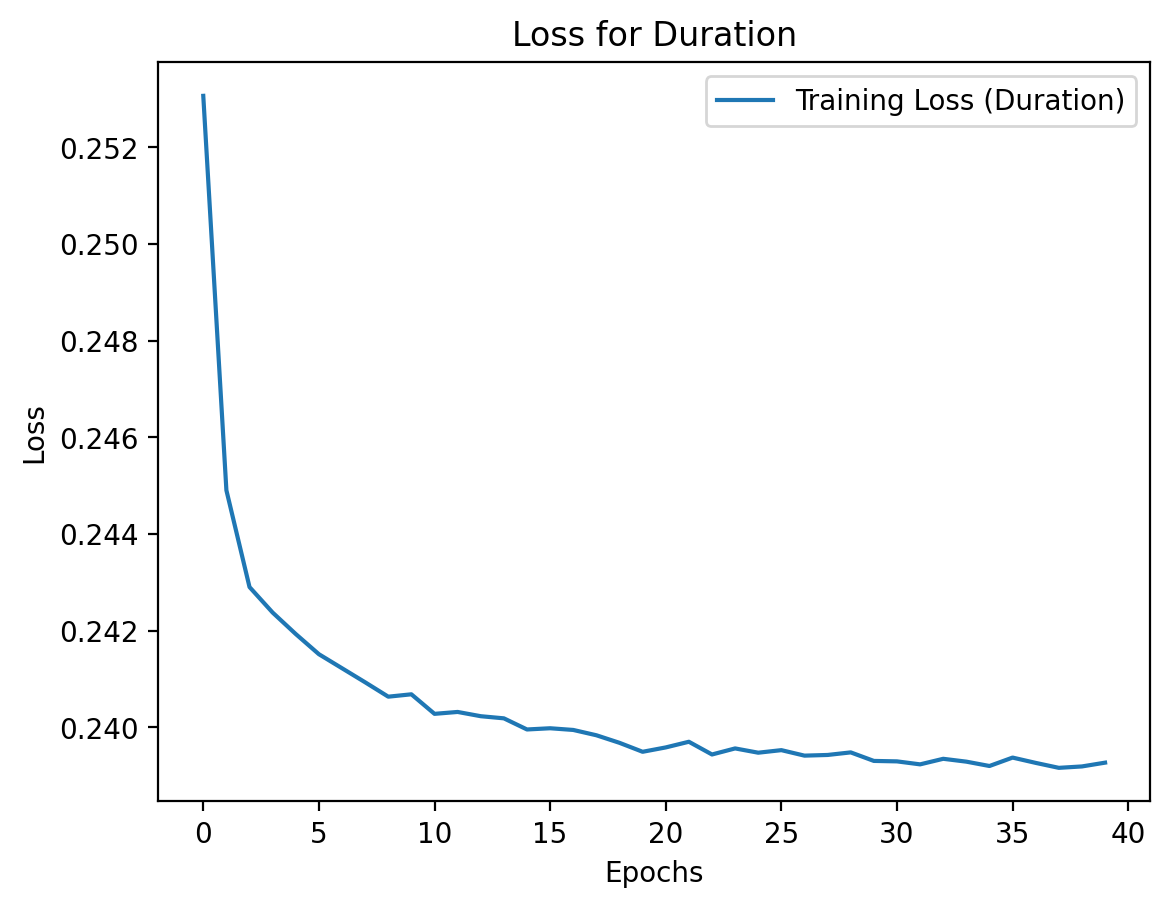

In [ ]:
plt.plot(history.epoch, history.history['duration_loss'], label='Training Loss (Duration)')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for Duration')
plt.legend()
plt.show()

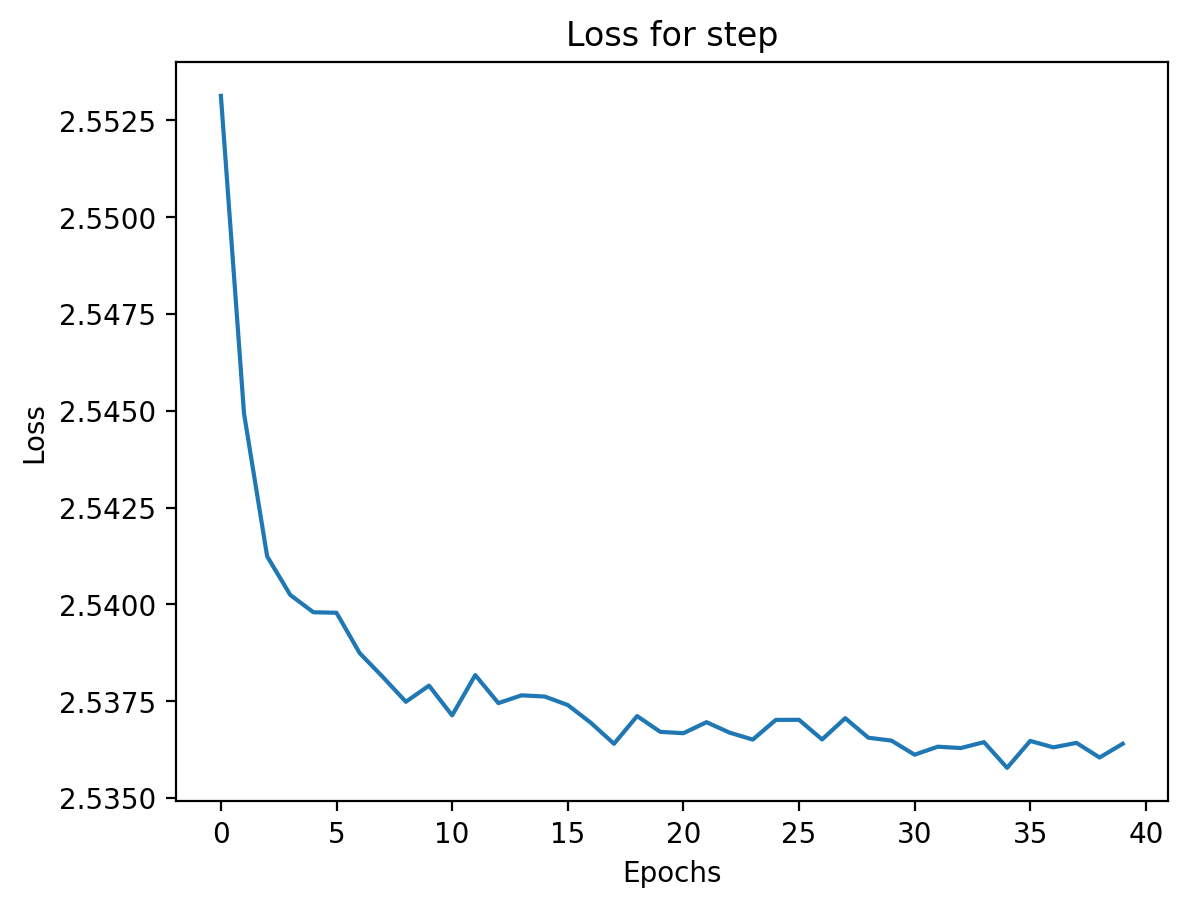

In [ ]:

plt.plot(history.epoch, history.history['step_loss'], label='Training Loss (Step)')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for step')
plt.show()

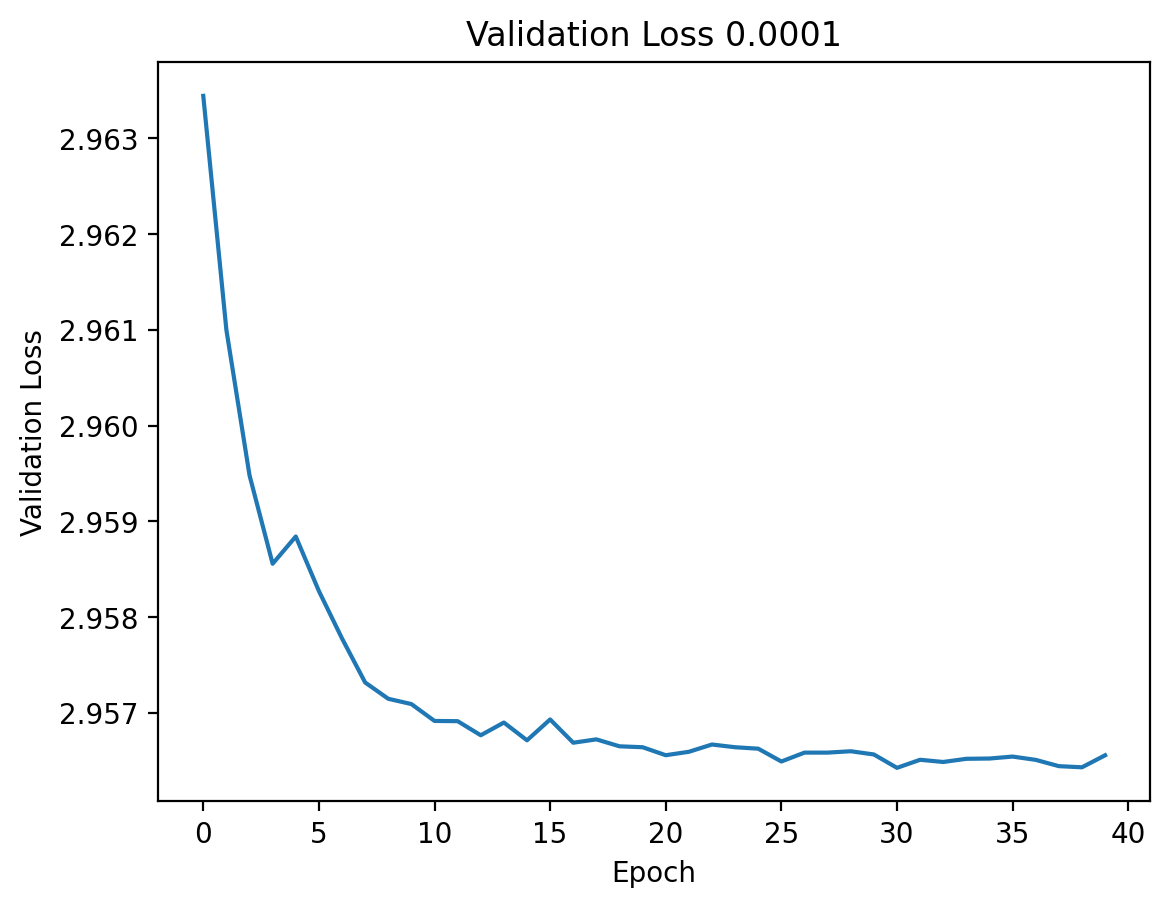

In [ ]:
val_loss = history.history['val_loss']

# Plot the validation loss
plt.plot(val_loss)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss 0.0001')
plt.show()

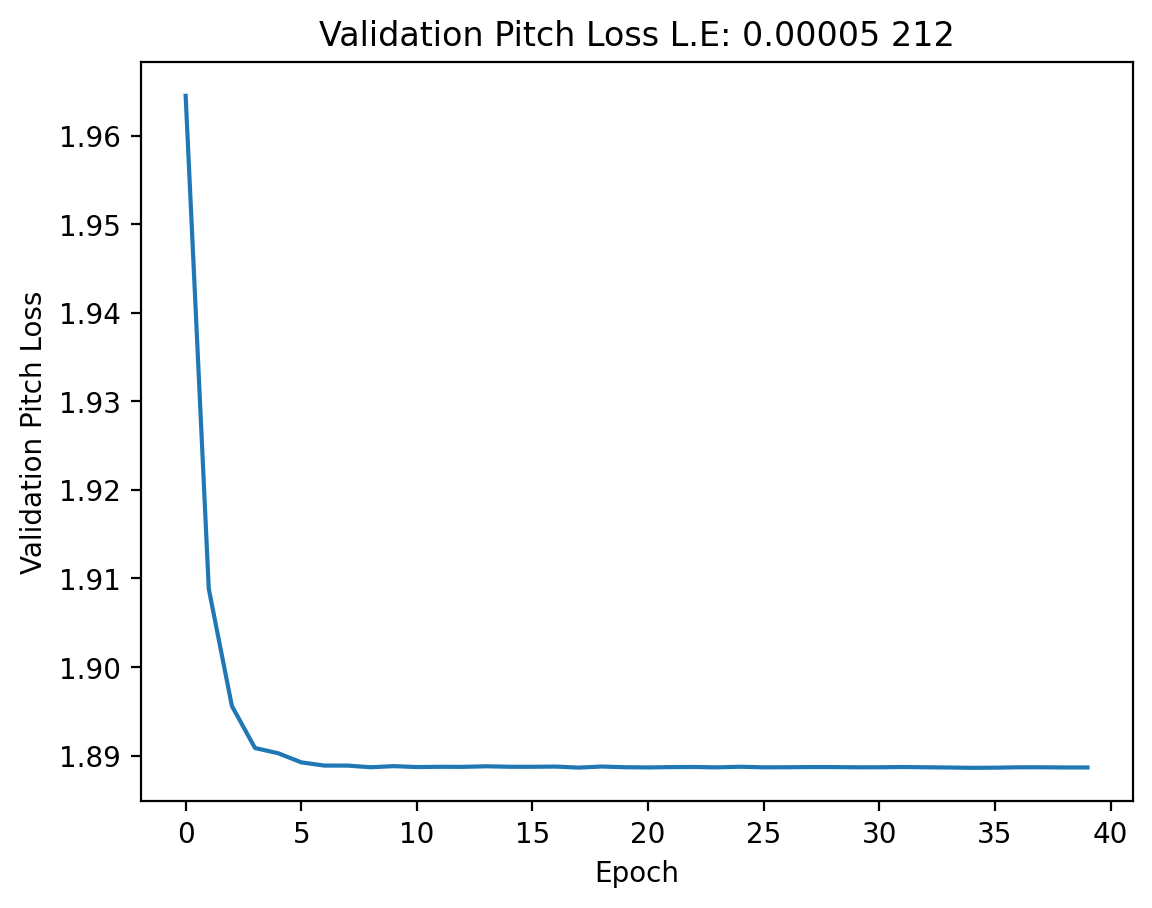

In [ ]:
val_loss = history.history['val_pitch_loss']

# Plot the validation loss
plt.plot(val_loss)
plt.xlabel('Epoch')
plt.ylabel('Validation Pitch Loss')
plt.title('Validation Pitch Loss L.E: 0.00005 212')
plt.show()

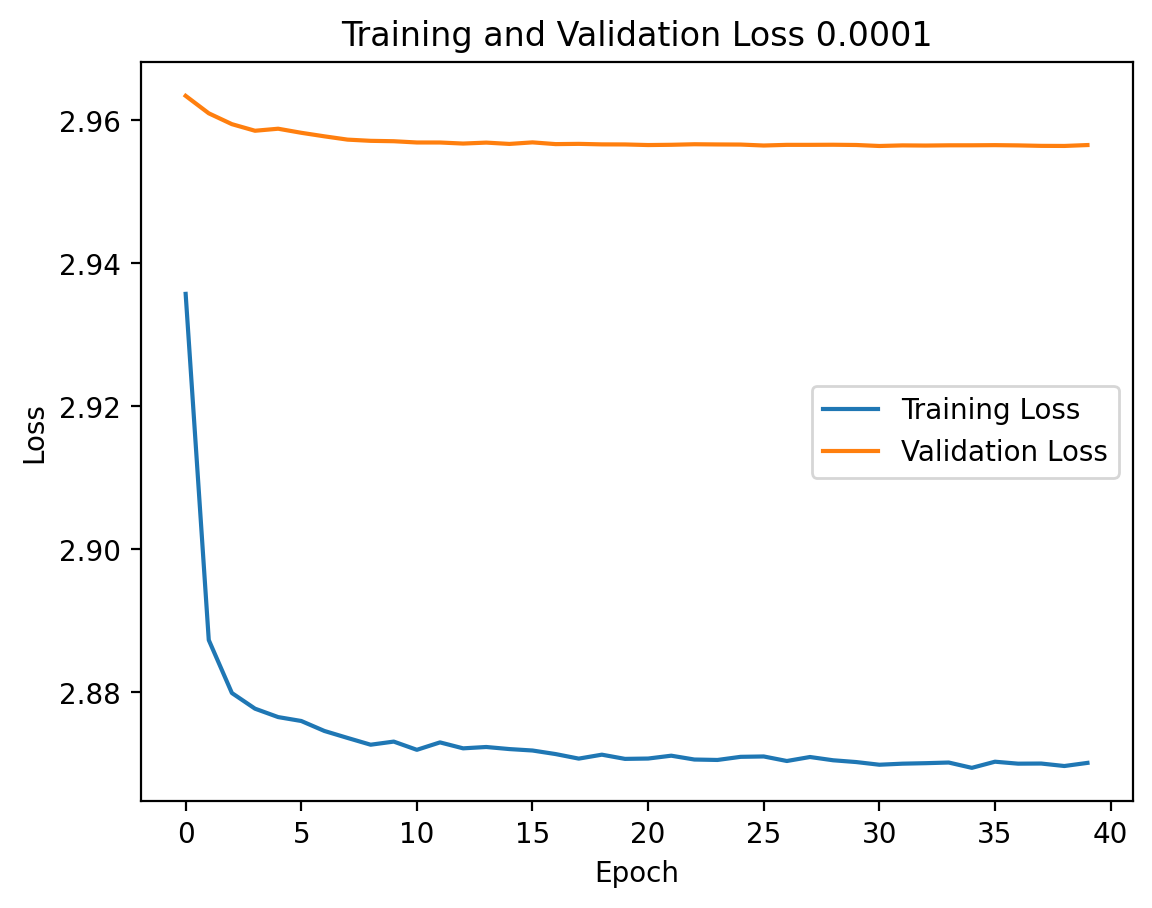

In [ ]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss 0.0001')
plt.legend()
plt.show()

In [ ]:
train_pitch_accuracy = history.history['pitch_sparse_categorical_accuracy']
train_step_accuracy = history.history['step_mae']
train_duration_accuracy = history.history['duration_mae']
val_pitch_accuracy = history.history['val_pitch_sparse_categorical_accuracy']
val_step_accuracy = history.history['val_step_mae']
val_duration_accuracy = history.history['val_duration_mae']

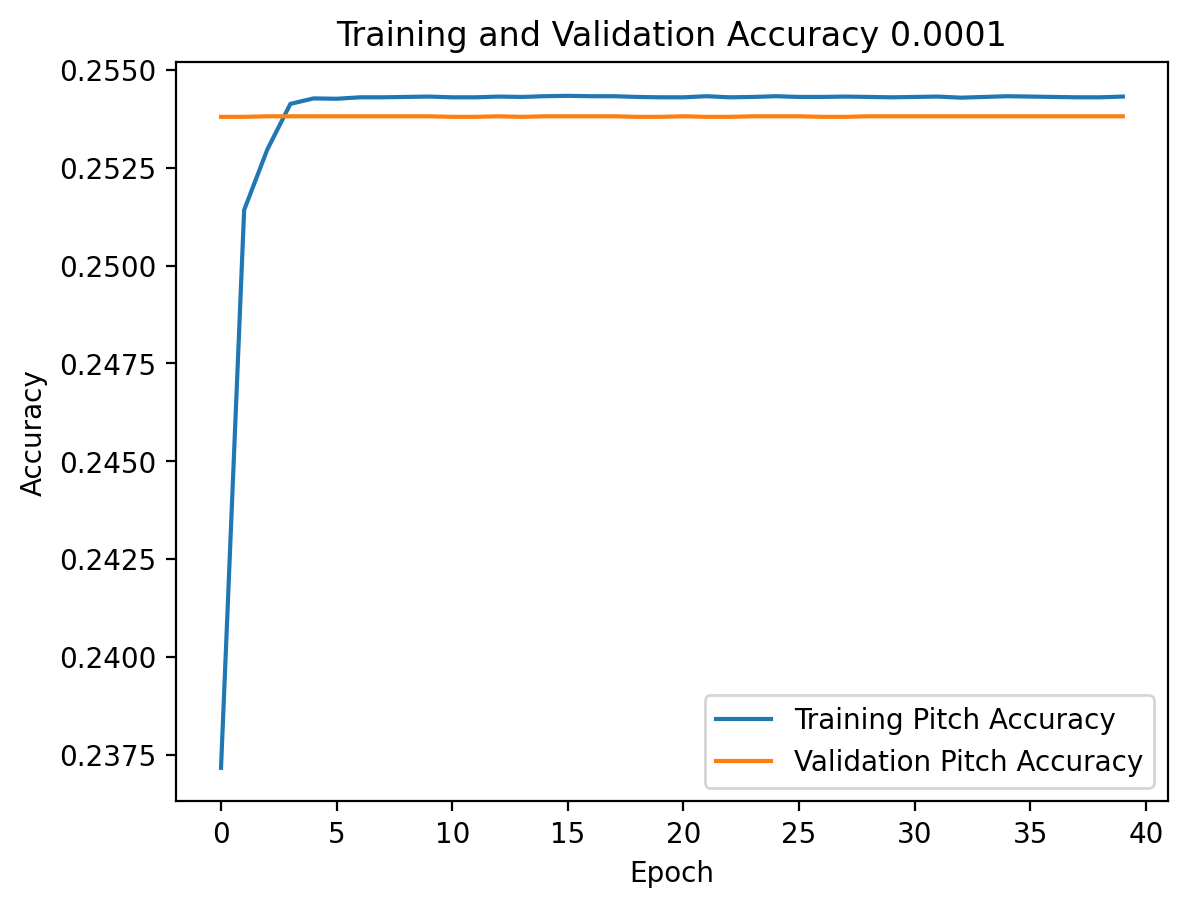

In [ ]:
plt.plot(train_pitch_accuracy, label='Training Pitch Accuracy')
plt.plot(val_pitch_accuracy, label='Validation Pitch Accuracy')
plt.title('Training and Validation Accuracy 0.0001')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

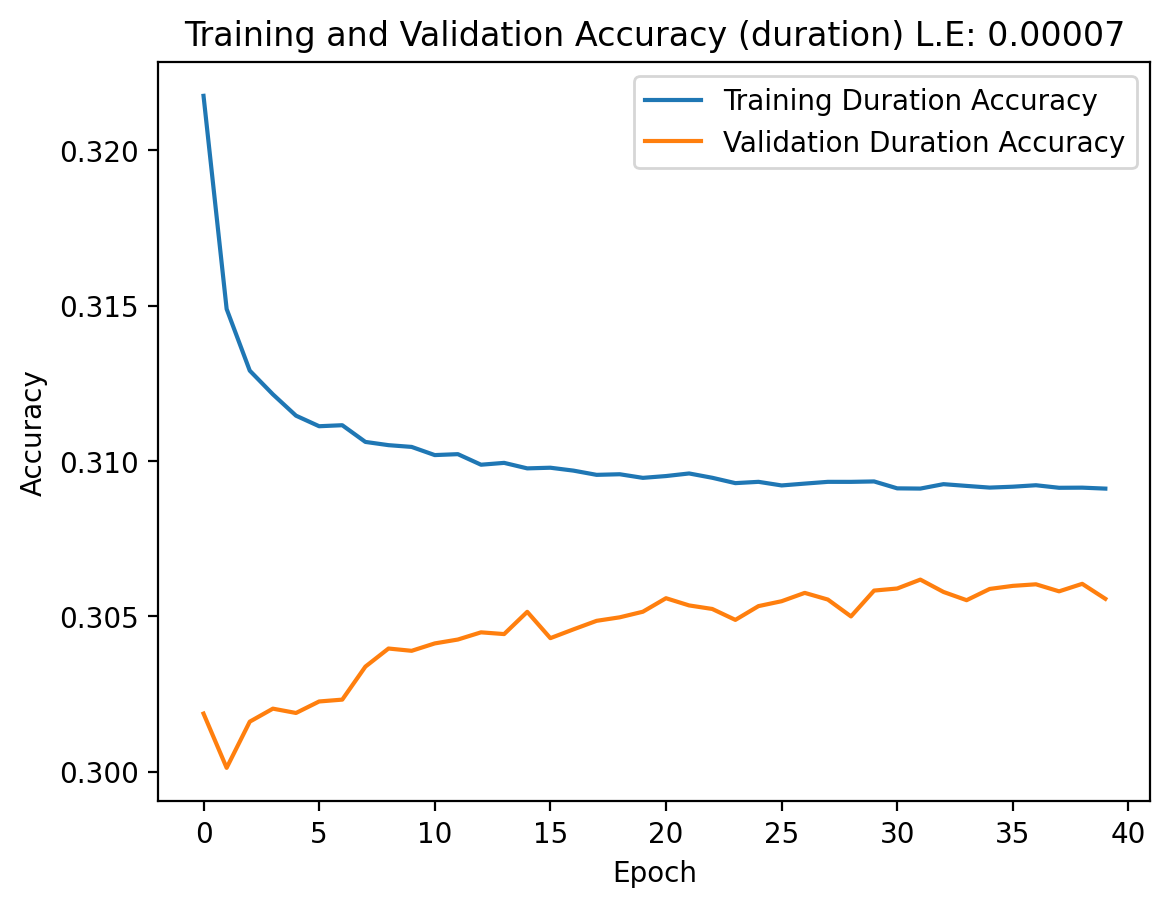

In [ ]:
plt.plot(train_duration_accuracy, label='Training Duration Accuracy')
plt.plot(val_duration_accuracy, label='Validation Duration Accuracy')
plt.title('Training and Validation Accuracy (duration) L.E: 0.00007')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'duration_loss', 'pitch_loss', 'step_loss', 'duration_mae', 'pitch_sparse_categorical_accuracy', 'step_mae', 'val_loss', 'val_duration_loss', 'val_pitch_loss', 'val_step_loss', 'val_duration_mae', 'val_pitch_sparse_categorical_accuracy', 'val_step_mae'])


# Generation


In [ ]:
def minor_scale(pitch):
    """Adjusts generated pitch to fit within the minor blues scale around the provided pitch."""
    root_pitch = pitch  # Use the generated pitch as the root
    # Intervals for the minor blues scale relative to the root pitch
    intervals = [0, 3, 5, 6, 7, 10]

    # Randomly select the number of intervals to include (up to all intervals)
    num_intervals = random.randint(3, len(intervals))

    # Randomly shuffle the intervals and select the first `num_intervals`
    random.shuffle(intervals)
    selected_intervals = intervals[:num_intervals]

    # Construct the scale based on the selected intervals
    adjusted_pitches = [root_pitch + interval for interval in selected_intervals]

    # Randomly select one of the adjusted pitches
    adjusted_pitch = random.choice(adjusted_pitches)

    return adjusted_pitch

In [ ]:
def predict_next_note(notes: np.ndarray, model: tf.keras.Model, temperature: float = 1.0) -> tuple[int, float, float]:
    """MINOR Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""
    assert temperature > 0

    # Add batch dimension
    inputs = tf.expand_dims(notes, 0)

    predictions = model.predict(inputs)
    pitch_logits = predictions['pitch']
    step = predictions['step']
    duration = predictions['duration']

    pitch_logits /= temperature
    pitch = tf.random.categorical(pitch_logits, num_samples=1)
    pitch = tf.squeeze(pitch, axis=-1)
    duration = tf.squeeze(duration, axis=-1)
    step = tf.squeeze(step, axis=-1)

    # `step` and `duration` values should be non-negative
    step = tf.maximum(0, step)
    duration = tf.maximum(0, duration)

  #   # Apply the blues scale to the generated pitches
  #  # pitch = minor_scale(int(pitch))

  #   # Constrain to an octave (use 60 as = middle C)
  #   pitch = tf.clip_by_value(pitch, 52, 62)

    # Iterate over the predictions
    print(f"Generated Note: Pitch={pitch}, Step={step}, Duration={duration}")

    return int(pitch), float(step), float(duration)

In [ ]:
temperature = 1.2
num_predictions = 16

sample_notes = np.stack([all_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

pitch_counts = generated_notes['pitch'].value_counts()

print("Pitch Counts:")
print(pitch_counts)

1/1 [==============================] - 0s 394ms/step
Generated Note: Pitch=[62], Step=[0.436002], Duration=[0.45223743]
1/1 [==============================] - 0s 20ms/step
Generated Note: Pitch=[70], Step=[0.29969043], Duration=[0.35313666]
1/1 [==============================] - 0s 19ms/step
Generated Note: Pitch=[62], Step=[0.32110792], Duration=[0.36392927]
1/1 [==============================] - 0s 20ms/step
Generated Note: Pitch=[67], Step=[0.32162338], Duration=[0.3659618]
1/1 [==============================] - 0s 20ms/step
Generated Note: Pitch=[65], Step=[0.32284912], Duration=[0.36634493]
1/1 [==============================] - 0s 18ms/step
Generated Note: Pitch=[67], Step=[0.3247587], Duration=[0.36777318]
1/1 [==============================] - 0s 19ms/step
Generated Note: Pitch=[62], Step=[0.32564032], Duration=[0.36809874]
1/1 [==============================] - 0s 18ms/step
Generated Note: Pitch=[60], Step=[0.32684335], Duration=[0.36936077]
1/1 [==============================

In [ ]:
out_file = 'cclassic909212.mid'
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)

In [ ]:
from google.colab import files
files.download(out_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysis

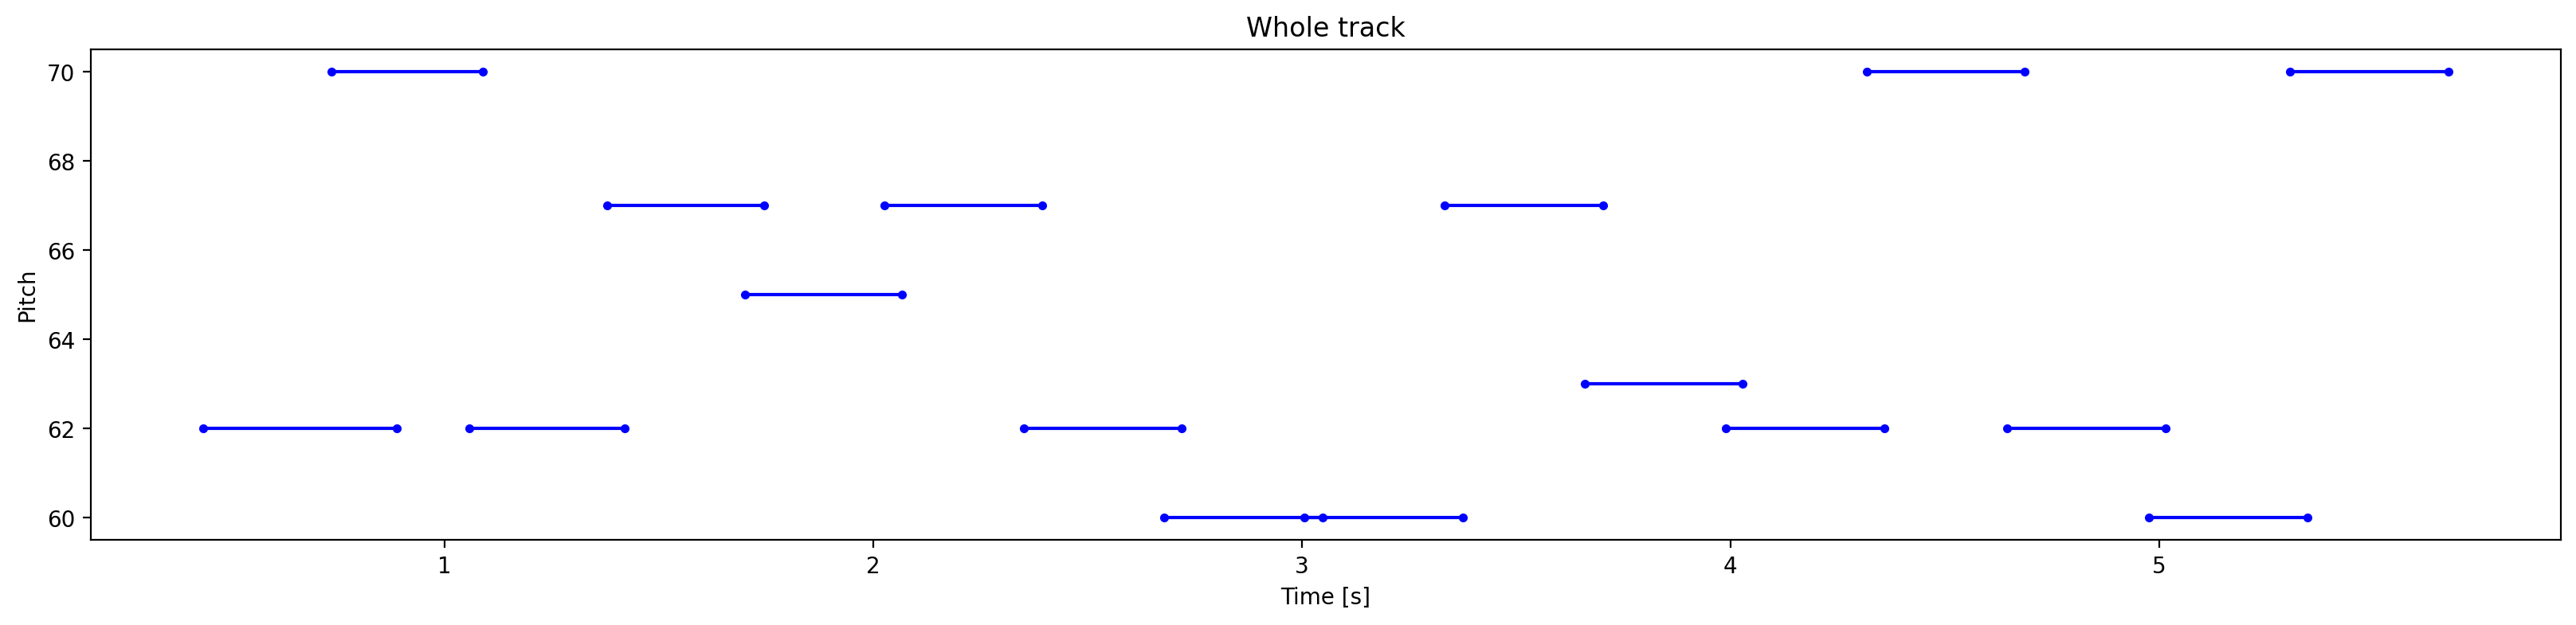

In [ ]:
plot_piano_roll(generated_notes)

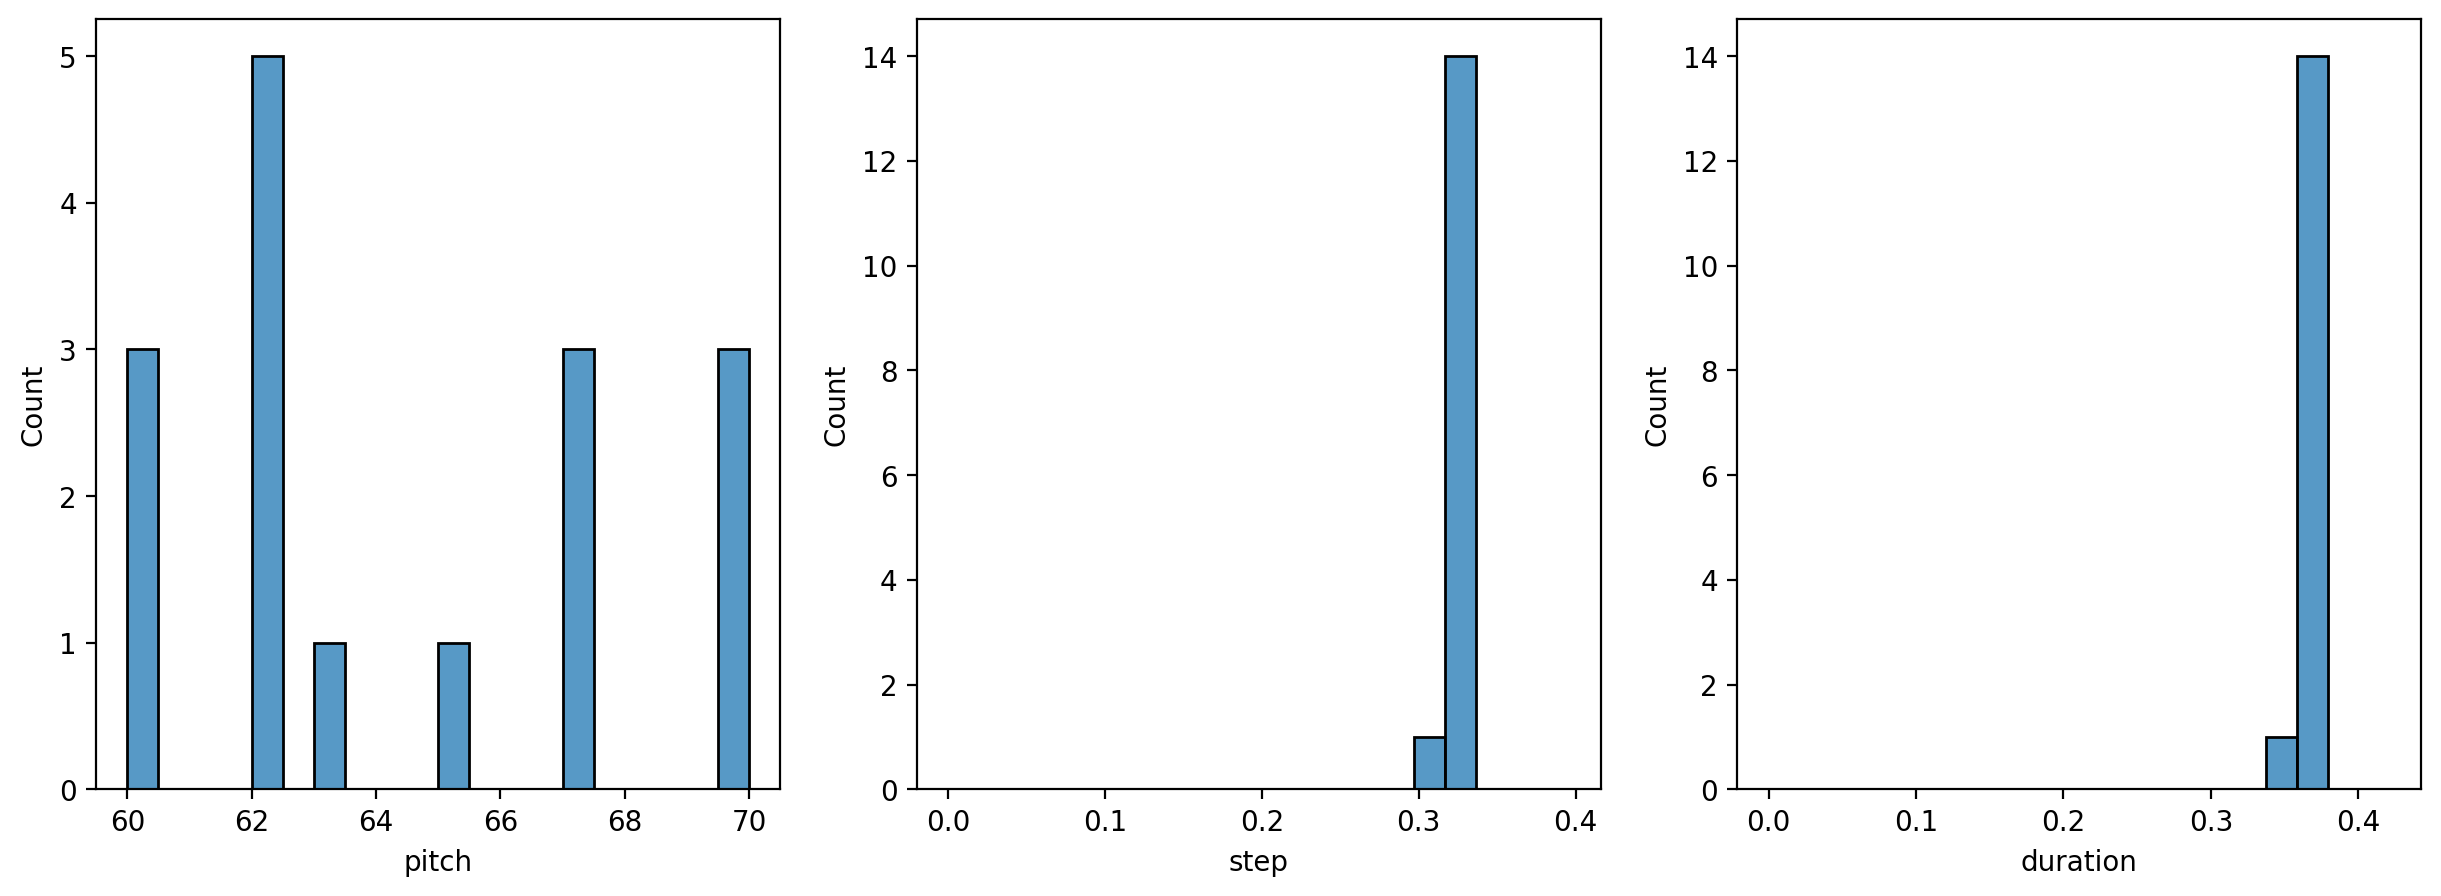

In [ ]:
plot_distributions(generated_notes)

In [ ]:
learning_rates = [0.001, 0.0001, 0.00001]

lr_min = 1e-10
lr_max = 1e+1
loss_fn = tf.keras.losses.MeanSquaredError()
model.compile(loss=loss_fn, optimizer=optimizer)

train_dataset = train_ds
n_epoch = 10

# learning rate schedule callback
def lr_schedule(epoch):
    return float(10 ** (-9 + epoch))

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

history = model.fit(train_dataset, epochs=n_epoch, callbacks=[lr_callback])

# Smooth the loslosses = history.history['loss']
lr_values = [10 ** (-9 - 2 * epoch / (n_epoch - 1)) for epoch in range(n_epoch)]


Epoch 1/10
2228/2228 [==============================] - 20s 8ms/step - loss: 6162.4565 - duration_loss: 0.2392 - pitch_loss: 6159.6865 - step_loss: 2.5369 - lr: 1.0000e-09
Epoch 2/10
2228/2228 [==============================] - 19s 8ms/step - loss: 6160.9141 - duration_loss: 0.2393 - pitch_loss: 6158.1348 - step_loss: 2.5362 - lr: 1.0000e-08
Epoch 3/10
2228/2228 [==============================] - 19s 8ms/step - loss: 6142.3042 - duration_loss: 0.2393 - pitch_loss: 6139.5332 - step_loss: 2.5363 - lr: 1.0000e-07
Epoch 4/10
2228/2228 [==============================] - 19s 8ms/step - loss: 5967.6348 - duration_loss: 0.2395 - pitch_loss: 5964.8613 - step_loss: 2.5368 - lr: 1.0000e-06
Epoch 5/10
2228/2228 [==============================] - 19s 9ms/step - loss: 879.1584 - duration_loss: 0.7270 - pitch_loss: 874.7931 - step_loss: 3.6376 - lr: 1.0000e-05
Epoch 6/10
2228/2228 [==============================] - 19s 8ms/step - loss: 199.4725 - duration_loss: 0.3337 - pitch_loss: 196.1963 - step_lo

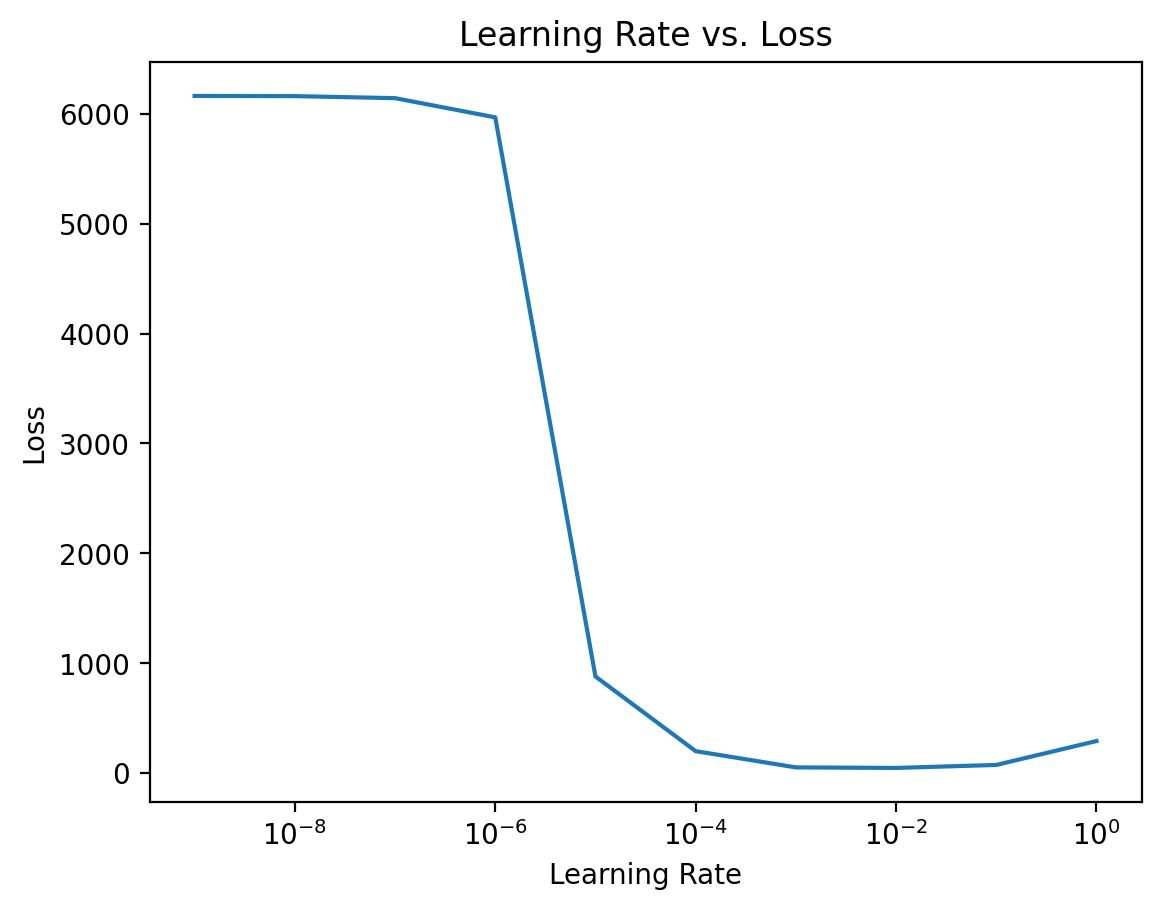

In [ ]:
learning_rates = history.history['lr']
losses = history.history['loss']
plt.plot(learning_rates, losses)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss')
plt.xscale('log')
plt.show()

In [ ]:
import h5py
model_file_path = '/content/drive/MyDrive/models/model_weightsBLUEStweaked.h5'
with h5py.File(model_file_path, 'r') as f:
    print("Root keys:", list(f.keys()))

Root keys: ['dropout', 'duration', 'input_1', 'lstm', 'pitch', 'step', 'top_level_model_weights']


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# savedModel=load_model('/content/drive/MyDrive/models/model_weightsBLUEStweaked.h5')
# savedModel.summary()

# Website Logic

In [ ]:
from google.colab import output
output.serve_kernel_port_as_window(8084)

<IPython.core.display.Javascript object>

In [ ]:
from flask import Flask

app = Flask(__name__)

model = model.load_weights('/content/drive/MyDrive/models/model_weightsBLUEStweaked.h5')


ValueError: Cannot assign value to variable ' lstm/lstm_cell/kernel:0': Shape mismatch.The variable shape (3, 1600), and the assigned value shape (3, 512) are incompatible.